# Used Car Data Analysis

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

import warnings
warnings.filterwarnings("ignore")

In [2]:
#storing the dataset to a dataframe named 'data'
data=pd.read_excel('UserCarData.xlsx')

In [3]:
#displaying the first few rows
data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500.0,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000.0,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000.0,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y


In [4]:
data.shape

(7906, 18)

There are 7906 observations and 18 features in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7904 non-null   float64
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7905 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7905 non-null   object 
 12  mileage            7904 non-null   object 
 13  engine             7906 non-null   object 
 14  max_power          7904 non-null   object 
 15  torque             7906 non-null   object 
 16  seats              7906 

In [6]:
#descriptive statistics
data.describe()

,Sales_ID,year,selling_price,km_driven,seats
count,7906.000000,7906.000000,7.906000e+03,7.904000e+03,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.917644e+04,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679360e+04,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.487500e+04,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.505000e+04,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
#descriptive statistics
data.describe(include=object)

,name,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,sold
count,7906,7906,7906,7906,7906,7905,7906,7905,7904,7906,7904,7906,7906
unique,1982,4,49,1310,4,3,2,5,393,121,320,441,2
top,Maruti Swift Dzire VDI,Central,California,New York City,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,N
freq,129,2376,901,196,4299,6563,6865,5215,225,1017,377,530,5906


# 2. Do you think there is a significant difference between the carsales of manual vs Automatic transmission, How can we prove or disprove this hypothesis.

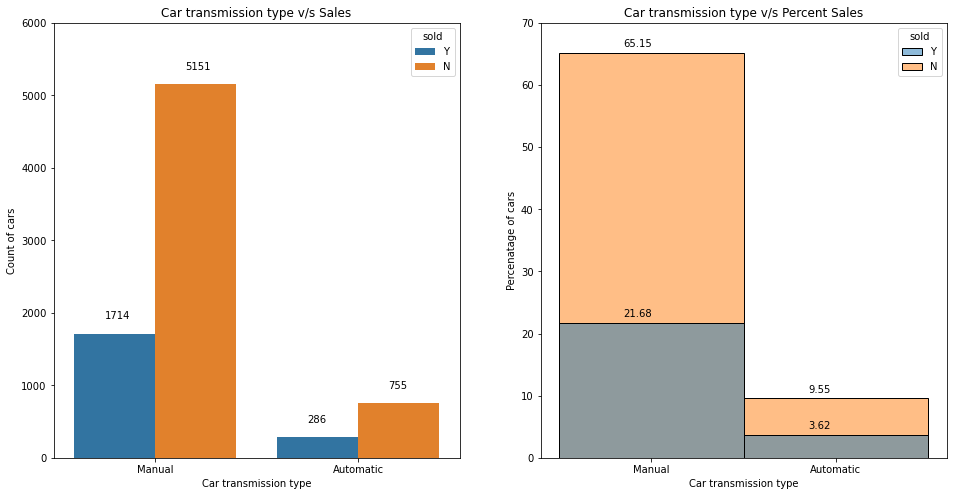

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
fig1=sns.countplot(x='transmission',hue='sold',data=data)
plt.title('Car transmission type v/s Sales')
plt.ylim(0,6000)
plt.xlabel('Car transmission type')
plt.ylabel('Count of cars')
#to get the count displayed on the chart
for p in fig1.patches:
    fig1.annotate(round(p.get_height(),2) , (p.get_x()+0.15, p.get_height()+200))
plt.subplot(1, 2, 2)
fig2=sns.histplot(x = 'transmission',data = data, hue = 'sold', stat = 'percent')
plt.title('Car transmission type v/s Percent Sales')
plt.ylim(0,70)
plt.xlabel('Car transmission type')
plt.ylabel('Percenatage of cars')
#to get the count displayed on the chart
for p in fig2.patches:
    fig2.annotate(round(p.get_height(),2) , (p.get_x()+0.35, p.get_height()+1))
plt.show()

Insights:<br>1. There is significant difference in the no. of manual cars when compared to automatic cars. Manual cars comprise around 87% of the total no. of cars.<br>2. However, the percentage of sales of automatics cars(37%) are slightly higher than manual cars(33%).

# 5. Business Development team assumes that east region should be our primary focus for sales, do you agress with the statement or you have different opinion.

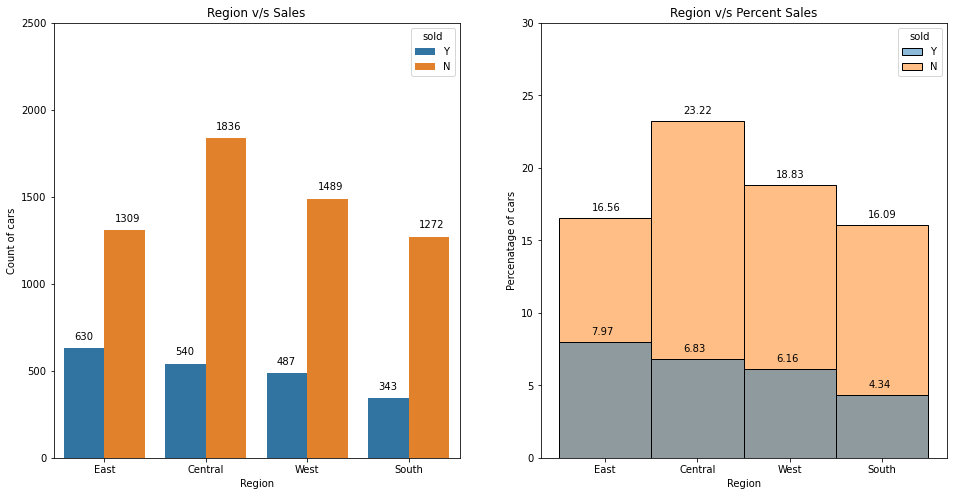

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
fig1=sns.countplot(x='Region',hue='sold',data=data)
plt.title('Region v/s Sales')
plt.ylim(0,2500)
plt.xlabel('Region')
plt.ylabel('Count of cars')
#to get the count displayed on the chart
for p in fig1.patches:
    fig1.annotate(round(p.get_height(),2) , (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1, 2, 2)
fig2=sns.histplot(x = 'Region',data = data, hue = 'sold', stat = 'percent')
plt.title('Region v/s Percent Sales')
plt.ylim(0,30)
plt.xlabel('Region')
plt.ylabel('Percenatage of cars')
#to get the count displayed on the chart
for p in fig2.patches:
    fig2.annotate(round(p.get_height(),2) , (p.get_x()+0.35, p.get_height()+0.5))
plt.show()

Insights:<br>1. The East region has the highest percentage of sales.<br>2. The primary focus should be on the South region.

# 4. Can you suggest the major cities in which company has to concentrate to meet the sales

In [10]:
from sklearn.preprocessing import LabelEncoder
lab_enc_state=LabelEncoder()
lab_enc_state.fit(data['sold'])
data['sold']=lab_enc_state.transform(data['sold'])   

# to create a new dataframe with cities, no. of cars, no. of cars not sold and percentage
data_city=pd.DataFrame(data['City'].value_counts())
data_city_sold = data[data['sold']>0].groupby('City')[['sold']].sum()
data_city['no_of_cars_sold']=data_city_sold['sold']
data_city['no_of_cars_sold']=data_city['no_of_cars_sold'].fillna(0)
data_city['not_sold_percent']=(data_city['City']-data_city['no_of_cars_sold'])*100/data_city['City']
data_city.sort_values(by=['not_sold_percent','City'],ascending=False,inplace=True)
data_city.head(10)

,City,no_of_cars_sold,not_sold_percent
Springfield,26,0.0,100.0
Richmond,20,0.0,100.0
Durango,20,0.0,100.0
Twentynine Palms,20,0.0,100.0
Danville,19,0.0,100.0
Prior Lake,18,0.0,100.0
Bangor,17,0.0,100.0
Albuquerque,17,0.0,100.0
Indianapolis,17,0.0,100.0
Roseville,16,0.0,100.0


Insights:<br>1. The above cities have the highest number of unsold cars.

# 6. Do you think there is a relationship between mileage of the car with  sold (Y/N), if so how can we prove it.

In [11]:
data['mileage']=data['mileage'].str.replace('kmpl','')
data['mileage']=data['mileage'].str.replace('km/kg','').astype(float)

In [12]:
corr = data['mileage'].corr(data['sold'])
print("Correlation between Mileage and sold(Y/N) is: ", round(corr, 4))

Correlation between Mileage and sold(Y/N) is:  -0.0293


Insights:<br>1. From the above, it can be inferred that there exists no relationship between mileage of the car and selling status of the car(whether sold or not).

# 3. Build a predective Model for selling_price and Identify the major impacting variables. (In Python / R )

## 3.1 Pre-processing

In [13]:
data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500.0,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5,1
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,1
2,3,Honda City 2017-2020 EXi,2006,158000,140000.0,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,1
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,1
4,5,Maruti Swift VXI BSIII,2007,130000,120000.0,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,1


### 3.1.1 Removing units from 'engine' and 'max power'

In [14]:
data['engine']=data['engine'].str.replace('CC','').astype(float)
data['max_power']=data['max_power'].str.replace('bhp','').astype(float)

### 3.1.2 Handling missing values 

In [15]:
#to check for null values
data.isna().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            2
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          1
transmission         0
owner                1
mileage              2
engine               0
max_power            2
torque               0
seats                0
sold                 0
dtype: int64

There are null values in the following features:<br>km_driven<br>seller_type<br>owner<br>mileage<br>max_power

#### 3.1.2.1 Handling missing values in categorical columns

In [16]:
#filing the missing values with mode for categorical columns
data['seller_type']=data['seller_type'].fillna(data['seller_type'].mode()[0])
data['owner']=data['owner'].fillna(data['owner'].mode()[0])

#### 3.1.2.2 Handling missing values in numerical columns

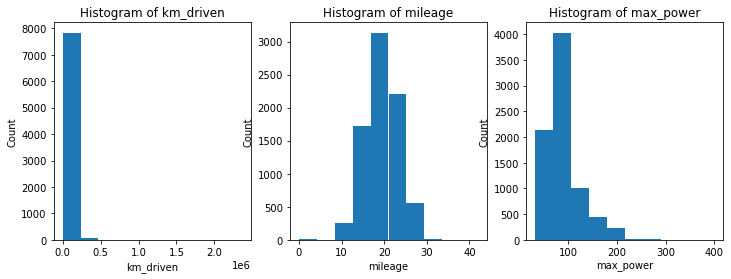

In [17]:
#plotting the histogram to check for skew
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(data['km_driven'])
plt.title('Histogram of km_driven')
plt.xlabel('km_driven')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(data['mileage'])
plt.title('Histogram of mileage')
plt.xlabel('mileage')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(data['max_power'])
plt.title('Histogram of max_power')
plt.xlabel('max_power')
plt.ylabel('Count')
plt.show()

In [18]:
#As there is a skew in the histogram, the missing values can be filled with median
data['km_driven']=data['km_driven'].fillna(data['km_driven'].median())
data['mileage']=data['mileage'].fillna(data['mileage'].median())
data['max_power']=data['max_power'].fillna(data['max_power'].median())

### 3.1.3 Handling outliers 

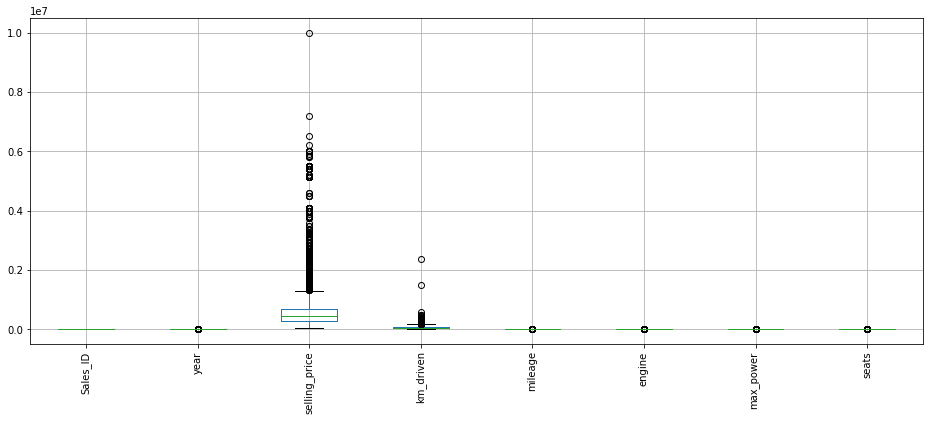

In [19]:
#selecting the integer datatype features
data_int = data.select_dtypes(include=['int64','float64'])
data_int.boxplot(figsize = (16,6))
plt.xticks(rotation=90)
plt.show()

In [20]:
#defining a function to handle outliers
def outlier_check(col):
    #calculating percentiles
    Q1=np.percentile(data[col],25,interpolation='midpoint')
    Q2=np.percentile(data[col],50,interpolation='midpoint')
    Q3=np.percentile(data[col],75,interpolation='midpoint')
    print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

    #calculating inter quartile range
    IQR=Q3-Q1
    print('IQR = ',round(IQR,2))

    #calculating the upper and lower limit of outliers
    low_lim=Q1-(1.5*IQR)
    up_lim=Q3+(1.5*IQR)
    print('Upper limit = ',round(up_lim,2),'\nLower limit = ',low_lim)

    #creating a list of outliers
    outlier=[]
    for x in data[col]:
        if (x>up_lim or x<low_lim):
            outlier.append(x)
    print('Outliers are :',outlier)

#### 3.1.3.1 Handling outliers in feature 'km-driven'

In [21]:
outlier_check('km_driven')

Q1 =  35000.0 
Q2 =  60000.0 
Q3 =  95000.0
IQR =  60000.0
Upper limit =  185000.0 
Lower limit =  -55000.0
Outliers are : [193000.0, 207890.0, 240000.0, 214000.0, 214000.0, 265000.0, 250000.0, 201850.0, 190000.0, 221889.0, 190000.0, 190000.0, 300000.0, 200000.0, 193623.0, 219000.0, 195000.0, 360003.0, 206000.0, 300000.0, 200000.0, 210000.0, 216000.0, 210000.0, 200000.0, 227000.0, 334000.0, 200000.0, 217000.0, 1500000.0, 202000.0, 205000.0, 188000.0, 225000.0, 300000.0, 190000.0, 375000.0, 300000.0, 189000.0, 189000.0, 255000.0, 188000.0, 380000.0, 200000.0, 270000.0, 230000.0, 300000.0, 248000.0, 218463.0, 210000.0, 220000.0, 260000.0, 240000.0, 300000.0, 186000.0, 300000.0, 210000.0, 260000.0, 200000.0, 198000.0, 217000.0, 210000.0, 2360457.0, 210000.0, 577414.0, 200000.0, 250000.0, 250000.0, 200000.0, 500000.0, 188000.0, 200000.0, 220000.0, 188000.0, 330000.0, 291000.0, 250000.0, 197000.0, 195000.0, 200000.0, 200000.0, 230000.0, 265000.0, 219000.0, 246000.0, 225000.0, 188000.0, 2250

In [22]:
#capping high outliers with upper bound
data['km_driven'][data['km_driven']>185000]=185000

#### 3.1.3.2 Handling outliers in feature 'mileage'

In [23]:
outlier_check('mileage')

Q1 =  16.78 
Q2 =  19.3 
Q3 =  22.32
IQR =  5.54
Upper limit =  30.63 
Lower limit =  8.470000000000002
Outliers are : [33.44, 42.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.52, 0.0, 0.0, 33.44, 0.0, 0.0, 32.26, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.44]


In [24]:
#capping low outliers with lower bound
data['mileage'][data['mileage']>=0]=8.47

### 3.1.4 Feature Engineering

In [25]:
#extracting the brand from the car name
data['brand'] = data.name.str.split().str.get(0)
data[['name','brand']].head()

,name,brand
0,Maruti Swift Dzire VDI,Maruti
1,Skoda Rapid 1.5 TDI Ambition,Skoda
2,Honda City 2017-2020 EXi,Honda
3,Hyundai i20 Sportz Diesel,Hyundai
4,Maruti Swift VXI BSIII,Maruti


In [26]:
data['year'].value_counts()

2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      14
1998       9
1997       9
2001       6
1994       2
1996       2
1995       1
Name: year, dtype: int64

In [27]:
#creating a phase feature which groups the years to different phases
phase = []
for row in data['year']:
    if row < 2006 :    phase.append('Phase-1')
    elif row < 2011:   phase.append('Phase-2')
    elif row < 2015:  phase.append('Phase-3')   
    else:           phase.append('Phase-4')
data['phase']=phase
data['phase'].value_counts()

Phase-4    4104
Phase-3    2479
Phase-2    1082
Phase-1     241
Name: phase, dtype: int64

### 3.1.5 Encoding

In [28]:
#descriptive statistics
data.describe(include=object)

,name,Region,State or Province,City,fuel,seller_type,transmission,owner,torque,brand,phase
count,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906
unique,1982,4,49,1310,4,3,2,5,441,31,4
top,Maruti Swift Dzire VDI,Central,California,New York City,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,Maruti,Phase-4
freq,129,2376,901,196,4299,6564,6865,5216,530,2367,4104


In [29]:
#label encoding
from sklearn.preprocessing import LabelEncoder
lab_enc_state=LabelEncoder()

for col in ['fuel','seller_type','transmission','owner','phase']:
    lab_enc_state.fit(data[col])
    data[col]=lab_enc_state.transform(data[col])       

In [30]:
#target encoding for features 'city' and 'brand' as they have large no. of values
encoder=ce.TargetEncoder(cols=['City']) 
data['City']=encoder.fit_transform(data['City'],data['selling_price'])
encoder=ce.TargetEncoder(cols=['brand']) 
data['brand']=encoder.fit_transform(data['brand'],data['selling_price'])

In [31]:
data[['brand','City','selling_price']].head()

,brand,City,selling_price
0,409011.141107,595279.338235,450000
1,609721.115385,688987.224490,370000
2,596920.886266,685977.193182,158000
3,473280.475000,685977.193182,225000
4,409011.141107,688987.224490,130000


### 3.1.6 Feature Reduction

In [32]:
#dropping some unnecessary columns
data.drop(['Sales_ID','name','year','Region','State or Province','torque'],axis=1,inplace=True)
data.head()

,selling_price,km_driven,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,brand,phase
0,450000,145500.0,595279.338235,1,1,1,0,8.47,1248.0,74.00,5,1,409011.141107,2
1,370000,120000.0,688987.224490,1,1,1,2,8.47,1498.0,103.52,5,1,609721.115385,2
2,158000,140000.0,685977.193182,3,1,1,4,8.47,1497.0,78.00,5,1,596920.886266,1
3,225000,127000.0,685977.193182,1,1,1,0,8.47,1396.0,90.00,5,1,473280.475000,1
4,130000,120000.0,688987.224490,3,1,1,0,8.47,1298.0,88.20,5,1,409011.141107,1


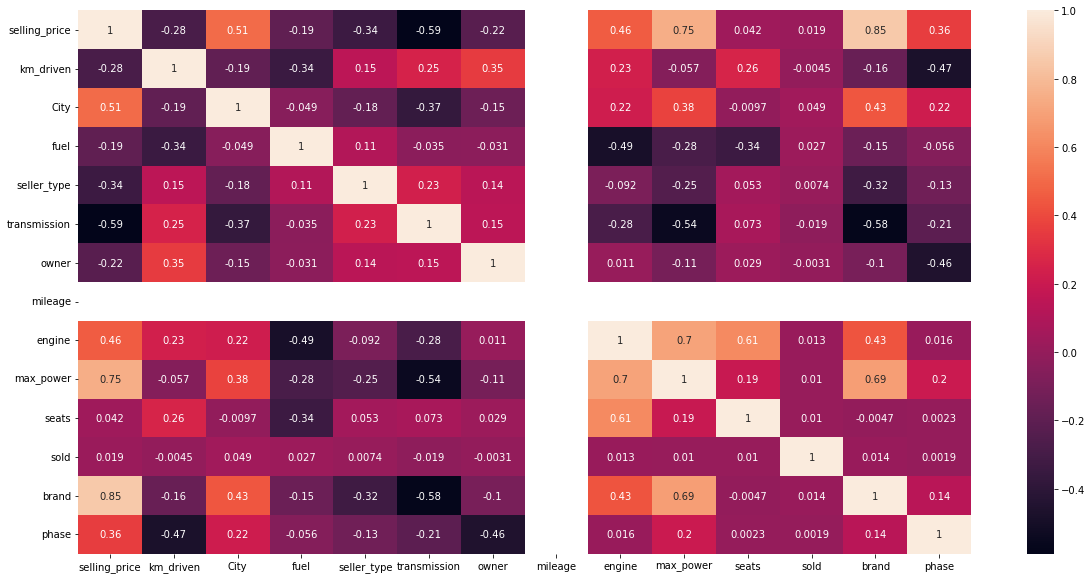

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

All the dependent varaiables show very less correlation. Hence, none can be deleted.

### 3.1.7 Feature Scaling

In [34]:
#dependent variable is stored in y
y=data['selling_price']
#independent variable is stored in x
x=data.drop(['selling_price'],axis=1) 
x.describe()

,km_driven,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,brand,phase
count,7906.000000,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7.906000e+03,7906.000000
mean,67472.183784,6.500087e+05,1.888313,0.889957,0.868328,0.789906,8.470000e+00,1458.708829,91.588282,5.416393,0.252972,6.498674e+05,2.321275
std,43026.750236,3.986565e+05,1.001478,0.397058,0.338155,1.205723,8.082935e-13,503.893057,35.746857,0.959208,0.434743,6.933166e+05,0.821437
min,1.000000,1.772834e+05,0.000000,0.000000,0.000000,0.000000,8.470000e+00,624.000000,32.800000,2.000000,0.000000,1.452811e+05,0.000000
25%,35000.000000,4.299741e+05,1.000000,1.000000,1.000000,0.000000,8.470000e+00,1197.000000,68.050000,5.000000,0.000000,4.090111e+05,2.000000
50%,60000.000000,5.538135e+05,1.000000,1.000000,1.000000,0.000000,8.470000e+00,1248.000000,82.000000,5.000000,0.000000,4.732805e+05,3.000000
75%,95000.000000,6.889872e+05,3.000000,1.000000,1.000000,2.000000,8.470000e+00,1582.000000,102.000000,5.000000,1.000000,5.969209e+05,3.000000
max,185000.000000,4.371345e+06,3.000000,2.000000,1.000000,4.000000,8.470000e+00,3604.000000,400.000000,14.000000,1.000000,5.150000e+06,3.000000


In [35]:
#min max scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler()
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.0,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,0.364711,0.112713,0.629438,0.444978,0.868328,0.197477,0.0,0.280104,0.160099,0.284699,0.252972,0.100822,0.773758
std,0.232578,0.095053,0.333826,0.198529,0.338155,0.301431,0.0,0.169092,0.097350,0.079934,0.434743,0.138533,0.273812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189185,0.060250,0.333333,0.500000,1.000000,0.000000,0.0,0.192282,0.095997,0.250000,0.000000,0.052696,0.666667
50%,0.324321,0.089777,0.333333,0.500000,1.000000,0.000000,0.0,0.209396,0.133987,0.250000,0.000000,0.065538,1.000000
75%,0.513511,0.122007,1.000000,0.500000,1.000000,0.500000,0.0,0.321477,0.188453,0.250000,1.000000,0.090243,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.2 Modelling

In [36]:
#splitting the dataset for training the model and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### 3.2.1 Linear Regression Model

In [37]:
#Linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [38]:
from sklearn.metrics import mean_squared_error
RMSE_lin_reg=np.sqrt(mean_squared_error(predictions,y_test))
print('RMSE of the linear regression model is ',round(RMSE_lin_reg,3))

RMSE of the linear regression model is  294063.851


### 3.2.2 Polynomial Regression Model

In [39]:
#polynomial regression model with degree 2
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)

#converting feature matrix into polynomial feature matrix
x_poly= poly_regs.fit_transform(x_train)  
poly =linear_model.LinearRegression()  
model=poly.fit(x_train, y_train) 
predictions=model.predict(x_test)

In [40]:
RMSE_poly_reg2=np.sqrt(mean_squared_error(predictions,y_test))
print('RMSE of the Polynomial regression model is ',round(RMSE_poly_reg2,3))

RMSE of the Polynomial regression model is  294063.851


In [41]:
#polynomial regression model with degree 5
poly_regs= PolynomialFeatures(degree= 5)  
x_poly= poly_regs.fit_transform(x_train)  
poly =linear_model.LinearRegression()  
model=poly.fit(x_train, y_train) 
predictions=model.predict(x_test)

In [42]:
RMSE_poly_reg5=np.sqrt(mean_squared_error(predictions,y_test))
print('RMSE of the linear Polynomial model is ',round(RMSE_poly_reg5,3))

RMSE of the linear Polynomial model is  294063.851


### 3.2.3 Ridge Regression Model

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.016,normalize=True)
model=ridge_reg.fit(x_train, y_train)
predictions = model.predict(x_test)

In [44]:
RMSE_ridg_reg=np.sqrt(mean_squared_error(predictions,y_test))
print('RMSE of the Ridge regression model is ',round(RMSE_ridg_reg,3))

RMSE of the Ridge regression model is  295578.482


### 3.2.4 LASSO Regression Model

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso()
model=lasso.fit(x_train, y_train)
predictions = model.predict(x_test)

In [46]:
RMSE_lasso=np.sqrt(mean_squared_error(predictions,y_test))
print('RMSE of the LASSO regression model is ',round(RMSE_lasso,3))

RMSE of the LASSO regression model is  294063.942


### 3.2.5 Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt_model=dt.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)

In [48]:
RMSE_Deci=np.sqrt(mean_squared_error(dt_pred,y_test))
print('RMSE of the Decision Tree model is ',round(RMSE_Deci,3))

RMSE of the Decision Tree model is  214575.588


### 3.2.6 Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_model=rf.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [50]:
RMSE_rf=np.sqrt(mean_squared_error(rf_pred,y_test))
print('RMSE of the Random Forest model is ',round(RMSE_rf,3))

RMSE of the Random Forest model is  145780.147


### 3.2.7 Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb_model=gb.fit(x_train,y_train)
gb_pred=gb_model.predict(x_test)

In [52]:
RMSE_gb=np.sqrt(mean_squared_error(gb_pred,y_test))
print('RMSE of the Gradient Boosting model is ',round(RMSE_gb,3))

RMSE of the Gradient Boosting model is  170898.24


### 3.2.8 XGBoost

In [53]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb_model=xgb.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)

In [54]:
RMSE_xgb=np.sqrt(mean_squared_error(xgb_pred,y_test))
print('RMSE of the XGBoost model is ',round(RMSE_xgb,3))

RMSE of the XGBoost model is  143955.132


### 3.2.9 AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
adb_model=adb.fit(x_train,y_train)
adb_pred=adb_model.predict(x_test)

In [56]:
RMSE_adb=np.sqrt(mean_squared_error(adb_pred,y_test))
print('RMSE of the AdaBoost model is ',round(RMSE_adb,3))

RMSE of the AdaBoost model is  313496.348


### Summary

In [57]:
print('RMSE values for different models:\n')
print('Linear Regression Model : ',round(RMSE_lin_reg))
print('Polynomial Regression Model(Degree = 2) : ',round(RMSE_poly_reg2))
print('Polynomial Regression Model(Degree = 5) : ',round(RMSE_poly_reg5))
print('Ridge Regression Model : ',round(RMSE_ridg_reg))
print('Lasso Regression Model : ',round(RMSE_lasso))
print('Decision Tree : ',round(RMSE_Deci))
print('Random Forest : ',round(RMSE_rf))
print('Gradient Boost : ',round(RMSE_gb,3))
print('XGBoost : ',round(RMSE_xgb,3))
print('AdaBoost : ',round(RMSE_adb,3))

RMSE values for different models:

Linear Regression Model :  294064
Polynomial Regression Model(Degree = 2) :  294064
Polynomial Regression Model(Degree = 5) :  294064
Ridge Regression Model :  295578
Lasso Regression Model :  294064
Decision Tree :  214576
Random Forest :  145780
Gradient Boost :  170898.24
XGBoost :  143955.132
AdaBoost :  313496.348


XGBoost provides the least RMSE value.

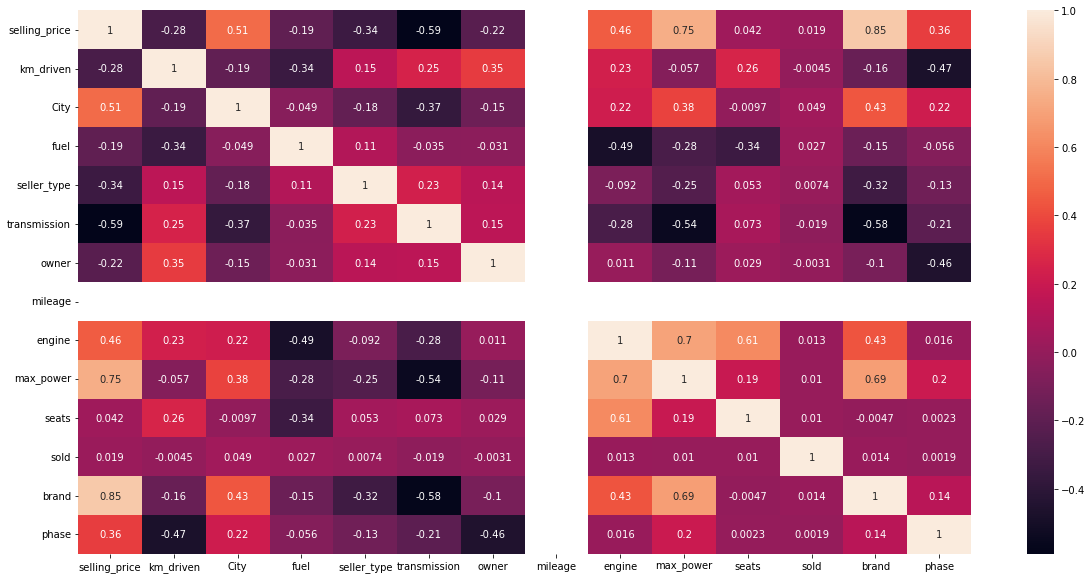

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

The major features impacting selling price are the brand value and maximum power. Also, the city feature has a slight positive impact on the selling price of the car.